# Cone Lift Control Data Analyzer

Parses and plots the data from the cone lift in order to fine tune its PID parameters

## Usage

* Set `dataUrl` to a link which points to the raw txt file you want to process. 
* Set the variables `useLift1` and `useLift2` to either true or false to determine whether or not to parse data from the respective lift joint.
* Set `outputText`, `plotTarget`, `plotValue`, `plotDistanceToTarget`, `plotSpeed`, and `plotAppliedVoltage` to customize the output style

Run the parser by clicking in the cell with code, and pressing the "run" button (located in the row of icons, it looks like a play/pause symbol).


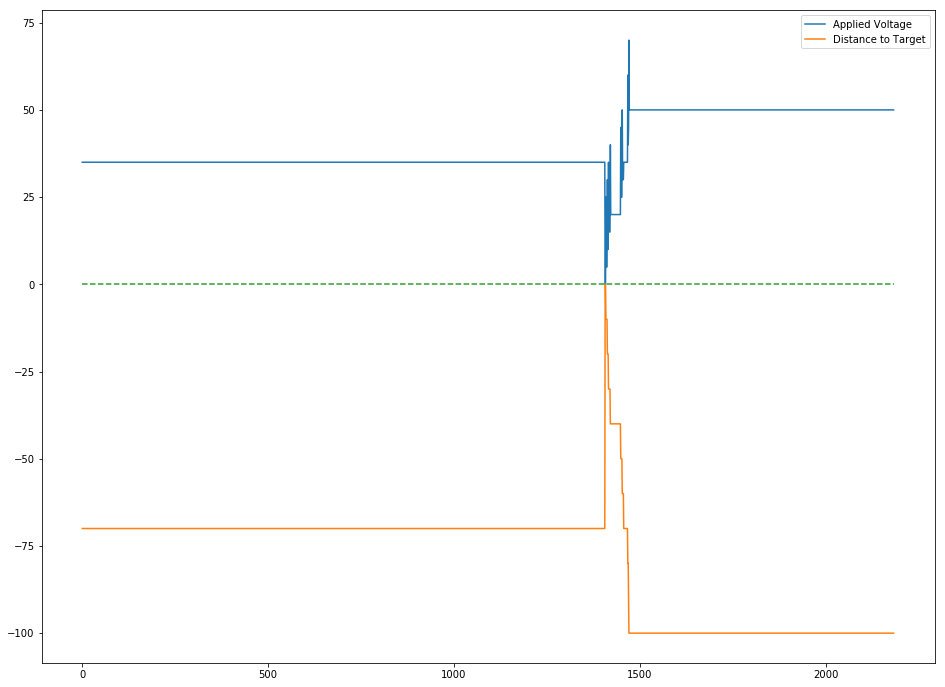

In [4]:
%matplotlib inline   
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

dataUrl = "https://raw.githubusercontent.com/PARobotics/Analysis-Data/master/2017-2018/August/15/Cone%20Lift%20Hold/1.txt"
useLift1 = False
useLift2 = True
outputText = False

plotTarget = 0
plotValue = 0
plotDistanceToTarget = 1
plotSpeed = 0
plotAppliedVoltage = 1

if useLift1: lift1Lines = []
if useLift2: lift2Lines = []

with urllib.request.urlopen(dataUrl) as url:
    s = url.read().decode("utf8").split("\n")   
    
for line in s:
    if useLift1 and "[LIFT 1] " in line and len(line.split(" ")) == 6: 
        line = line.replace("[LIFT 1] ", "")
        lift1Lines.append(line)
    if useLift2 and "[LIFT 2] " in line and len(line.split(" ")) == 6: 
        line = line.replace("[LIFT 2] ", "")
        lift2Lines.append(line)
        

if useLift1:
    plt.figure(figsize = (16,12))
    
    target = []
    value = []
    speed = []
    appliedVoltage = []
    distanceToTarget = []
    
    for line in lift1Lines:
        if outputText: print(line)
        line = line.replace("\r", "").split(" ")
        if plotTarget and len(line[0]) <= 5 and len(line[0]) > 0: target.append(int(line[0]))
        if plotValue and len(line[1]) <= 5 and len(line[1]) > 0: value.append(int(line[1]))
        if plotSpeed and len(line[2]) <= 5 and len(line[2]) > 0: speed.append(int(line[2]))
        if plotAppliedVoltage and len(line[3]) <= 4 and len(line[3]) > 0: appliedVoltage.append(int(line[3]))
        if plotDistanceToTarget and len(line[1]) <= 5 and len(line[0]) <= 5 and len(line[0]) > 0 and len(line[1]) > 0: distanceToTarget.append(int(line[0]) - int(line[1]))
        
   
    if plotTarget: plt.plot(target, label = "Target Value")
    if plotValue: plt.plot(value, label = "Actual Value")
    if plotSpeed: plt.plot(speed, label = "Speed")
    if plotAppliedVoltage: plt.plot(appliedVoltage, label = "Applied Voltage")
    if plotDistanceToTarget: plt.plot(distanceToTarget, label = "Distance to Target")
        
    plt.plot([0, len(lift1Lines)], [0, 0], "--")
    
    plt.legend()
    plt.show()
 
    if outputText: print("\n")
    
if useLift2:
    plt.figure(figsize = (16,12))
    
    target = []
    value = []
    speed = []
    appliedVoltage = []
    distanceToTarget = []
    
    for line in lift2Lines:
        if outputText: print(line)
        line = line.replace("\r", "").split(" ")
        if plotTarget and len(line[0]) <= 5 and len(line[0]) > 0: target.append(int(line[0]))
        if plotValue and len(line[1]) <= 5 and len(line[1]) > 0: value.append(int(line[1]))
        if plotSpeed and len(line[2]) <= 5 and len(line[2]) > 0: speed.append(int(line[2]))
        if plotAppliedVoltage and len(line[3]) <= 4 and len(line[3]) > 0: appliedVoltage.append(int(line[3]))
        if plotDistanceToTarget and len(line[1]) <= 5 and len(line[0]) <= 5 and len(line[0]) > 0 and len(line[1]) > 0: distanceToTarget.append(int(line[0]) - int(line[1]))
        
   
    if plotTarget: plt.plot(target, label = "Target Value")
    if plotValue: plt.plot(value, label = "Actual Value")
    if plotSpeed: plt.plot(speed, label = "Speed")
    if plotAppliedVoltage: plt.plot(appliedVoltage, label = "Applied Voltage")
    if plotDistanceToTarget: plt.plot(distanceToTarget, label = "Distance to Target")
        
    plt.plot([0, len(lift2Lines)], [0, 0], "--")
    
    plt.legend()
    plt.show()